In [11]:
# downoading and loading the data
import kagglehub
import shutil
import pandas as pd 
import os 

#download the data
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')
print('Data source import complete.')

#store the data
src_path = '../data/raw/creditcard.csv'
shutil.copy(
    os.path.join(mlg_ulb_creditcardfraud_path,'creditcard.csv'),
    src_path
)
print('Data stored in working directory.')

# load the data
df = pd.read_csv(src_path)
df.head(5)

Data source import complete.
Data stored in working directory.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
#checking null values
df.isnull().sum().sum()

np.int64(0)

In [17]:
# checking the class distribution = {1:Normal,0:Fraud}
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

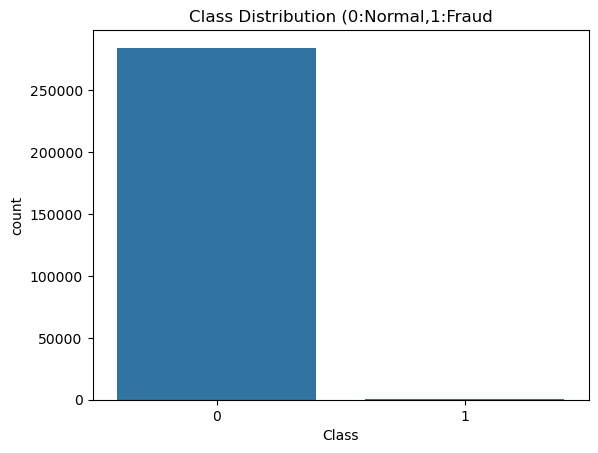

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class',data = df)
plt.title("Class Distribution (0:Normal,1:Fraud")
plt.show()

In [20]:
#check duplicates
df.duplicated().sum()

np.int64(1081)

So we got to drop these duplicates and again check the distribution.

In [21]:
df.drop_duplicates(inplace=True)
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [22]:
#converting time 
df['Time'] = pd.to_datetime(df['Time'],unit = 's')
df['Time'].head(5)

0   1970-01-01 00:00:00
1   1970-01-01 00:00:00
2   1970-01-01 00:00:01
3   1970-01-01 00:00:01
4   1970-01-01 00:00:02
Name: Time, dtype: datetime64[ns]

In [23]:
# creating new features
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['min'] = df['Time'].dt.minute

In [24]:
# dropping the Time column
df.drop(columns=['Time'],axis=1,inplace=True)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,day,hour,min
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0,0


Let us take a look at the 32 columns now

In [ ]:
# Creating the input feature matrix and target vector
X = df.drop(columns=['Class']).copy()
y = df['Class']
X.shape,y.shape

((283726, 32), (283726,))

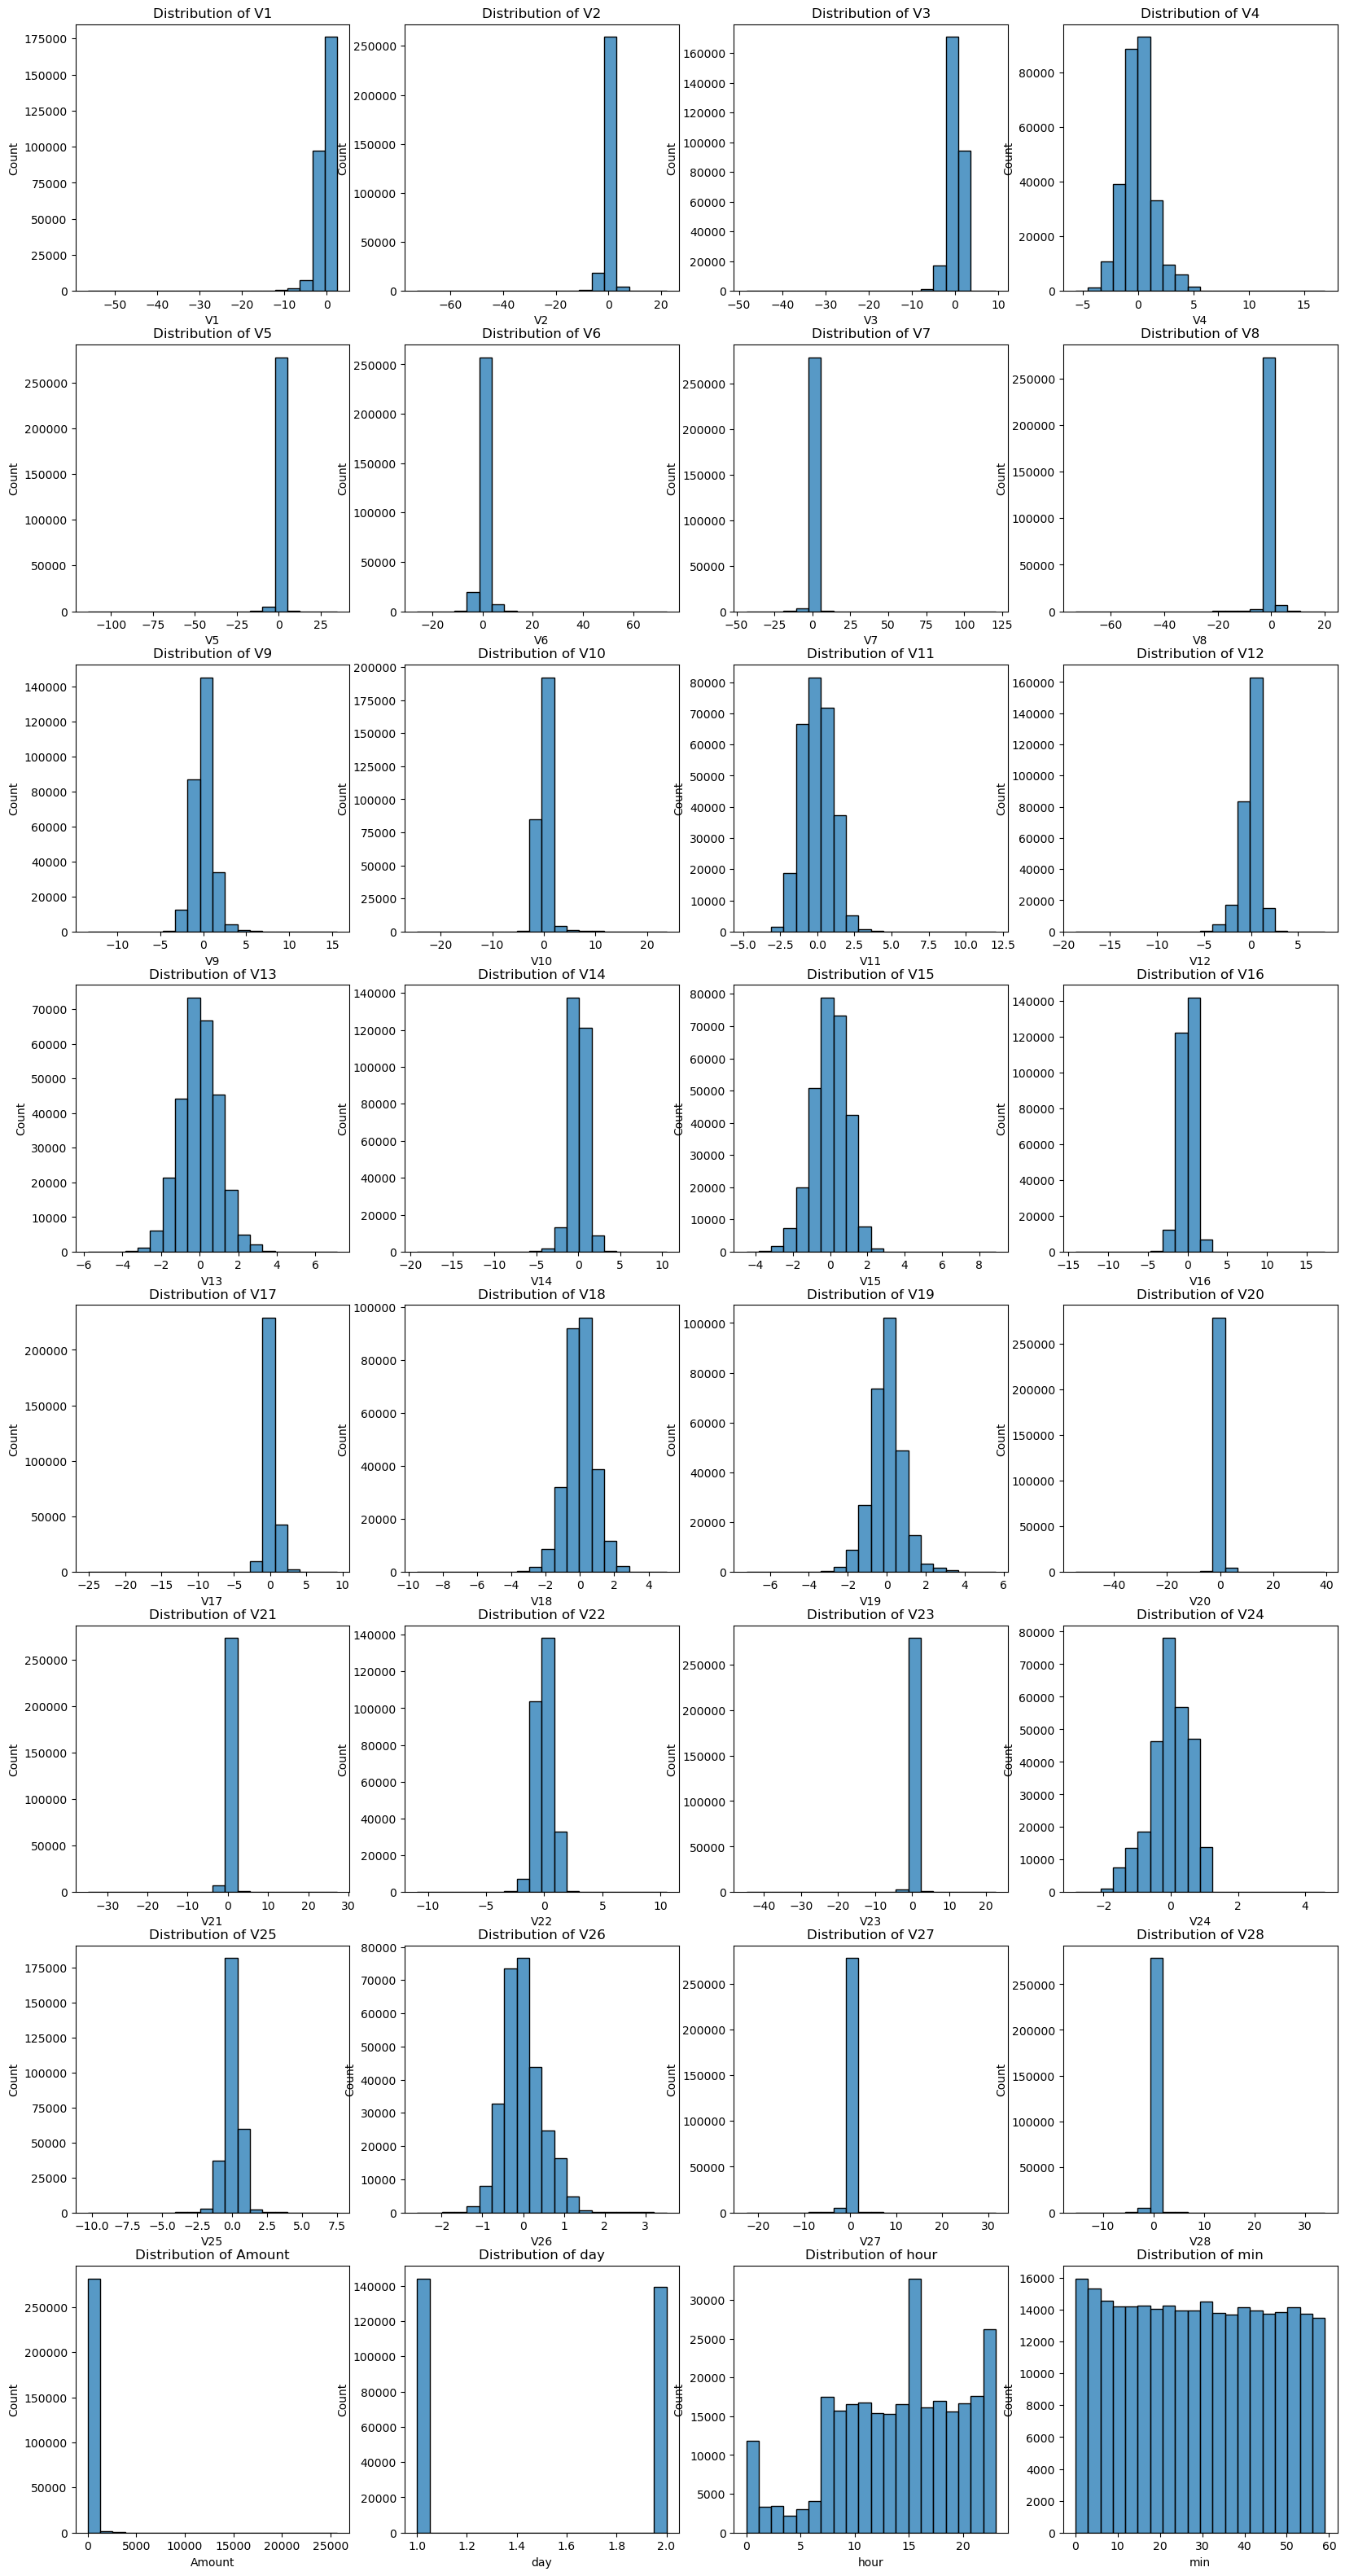

In [ ]:
#histplots
plt.figure(figsize=(20,40))
for col in X.columns:
    plt.subplot(8,4,X.columns.get_loc(col)+1)
    sns.histplot(data=X,x=col,bins=20)
    plt.title(f"Distribution of {col}")

plt.show();

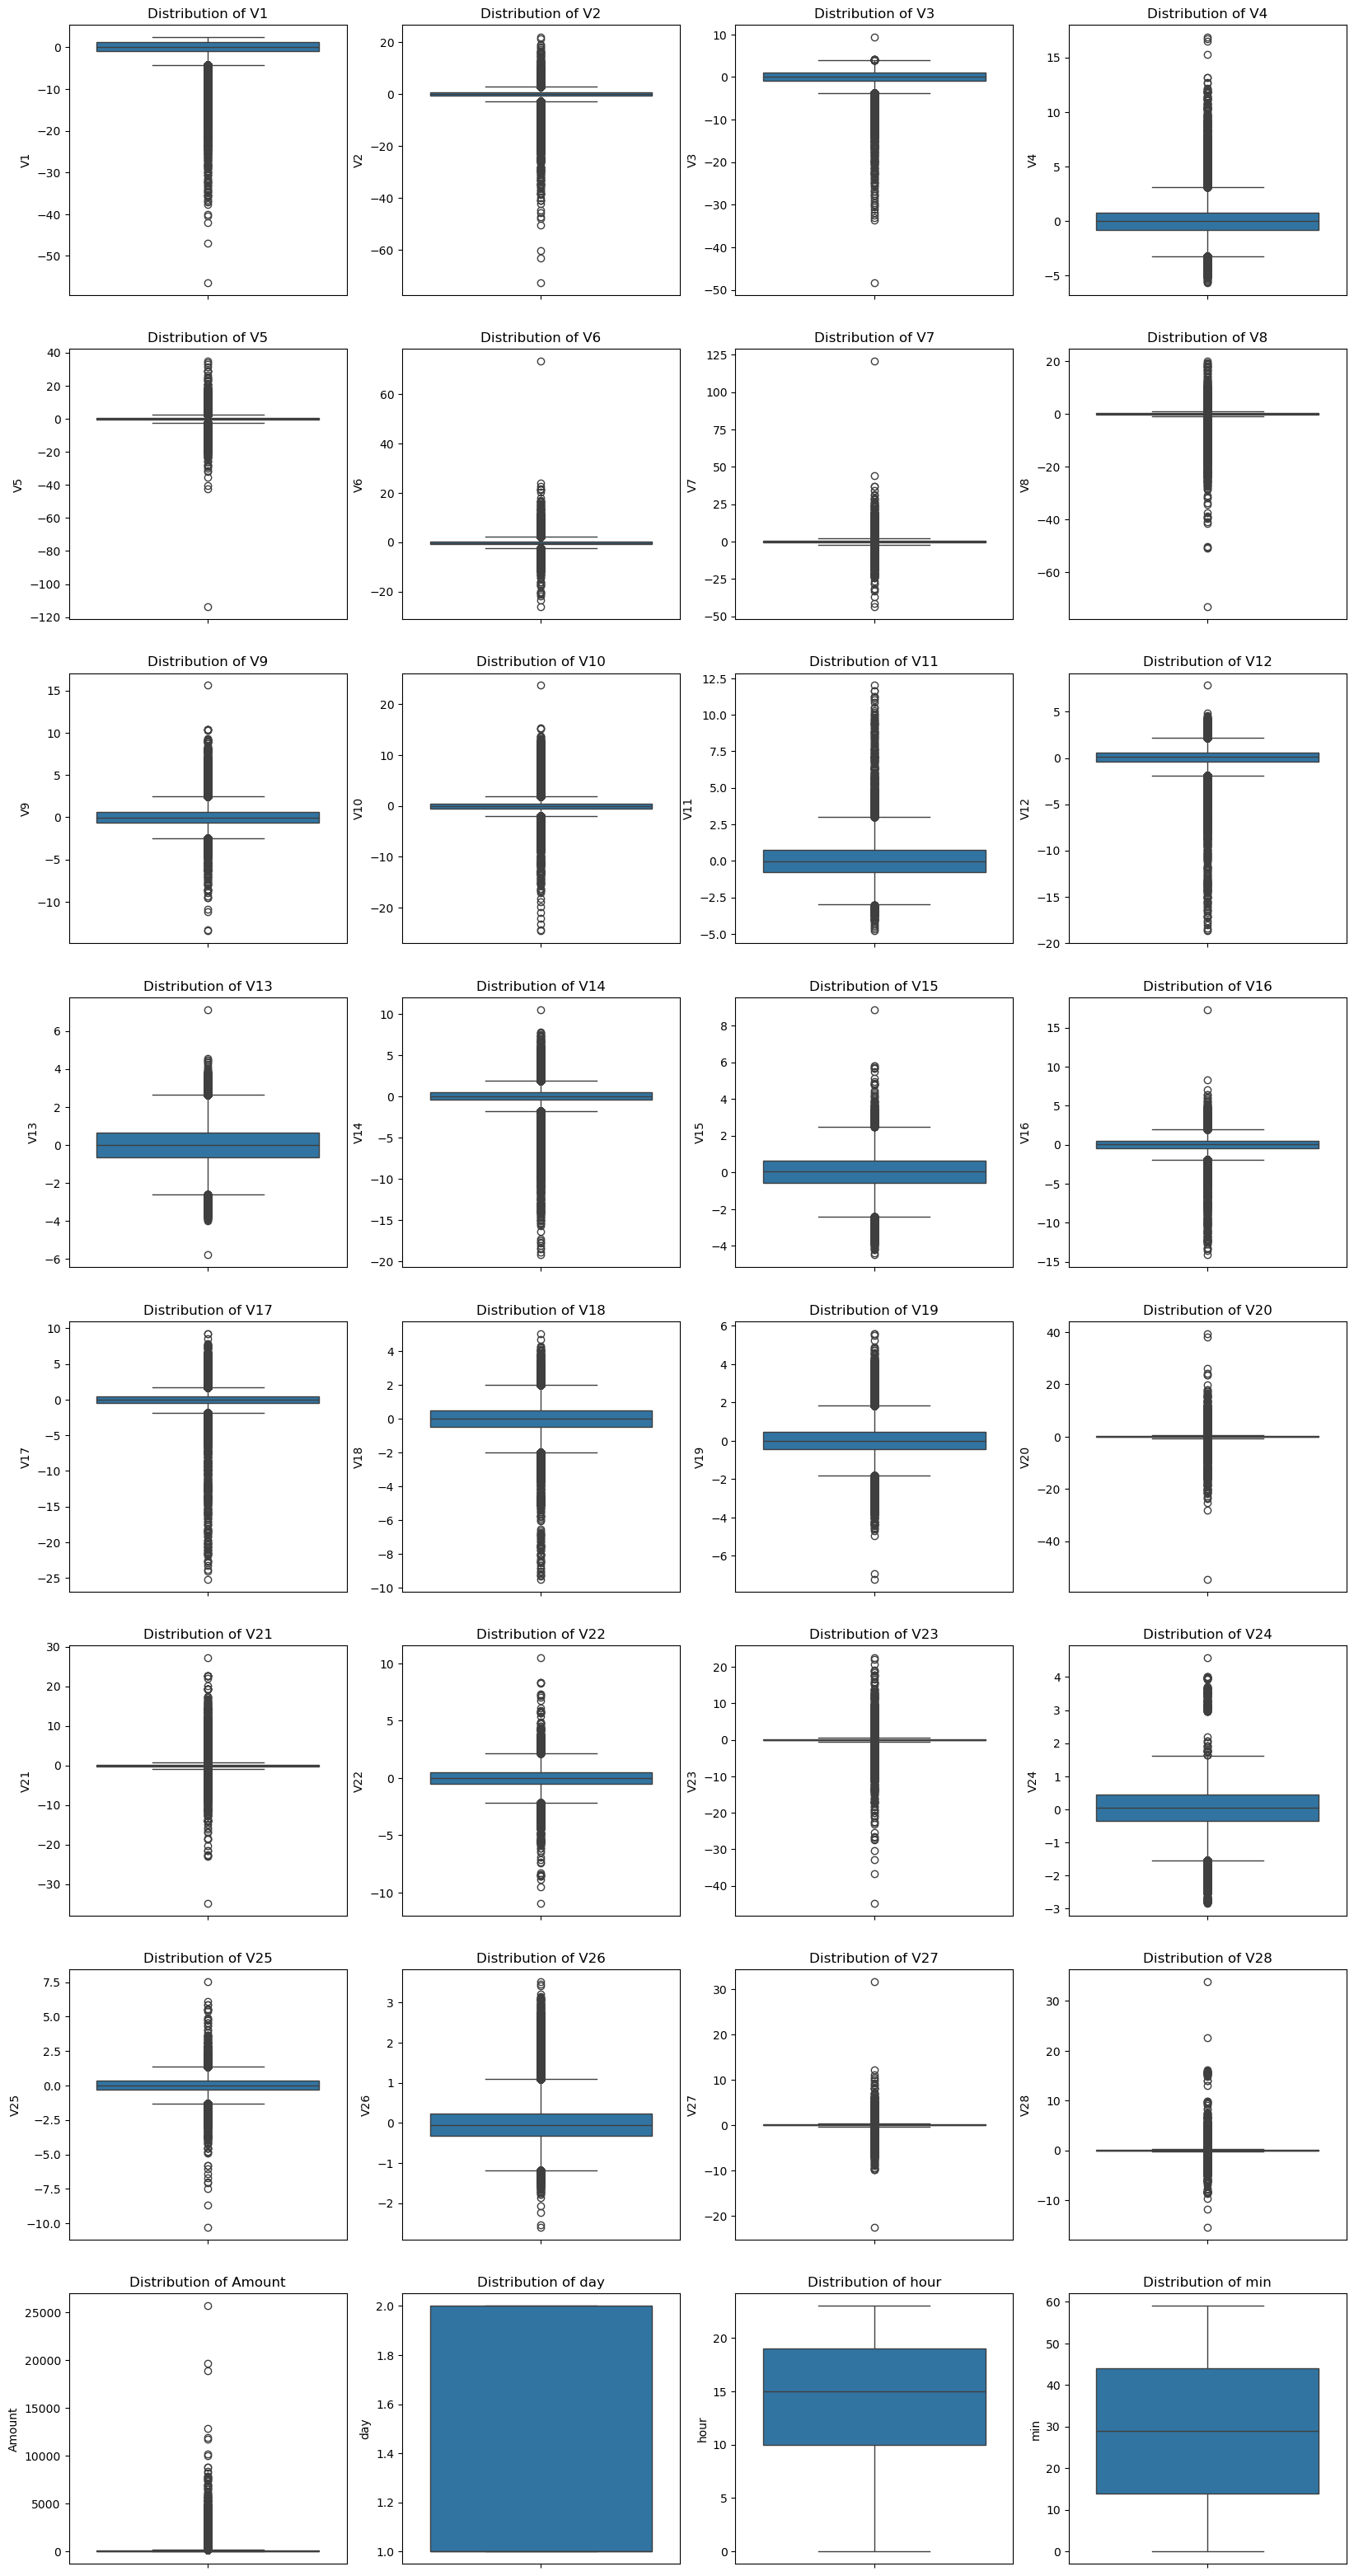

In [27]:
# boxplots
plt.figure(figsize=(20,40))
for col in X.columns:
    plt.subplot(8,4,X.columns.get_loc(col)+1)
    sns.boxplot(data=X,y=col)
    plt.title(f"Distribution of {col}")

plt.show();

In [28]:
# Checking outliers
def outliers(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1
  lower_bound = q1 - (1.5*IQR)
  upper_bound = q3 + (1.5*IQR)

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  print('='*20)
  print(f"Feature: {col}")
  print(f"Total number of outliers: {len(outliers)}")
  if len(outliers) == 0:
    print("No fraud cases in outliers")
  else:
    print(f"Fraud cases in outliers: {len(outliers[outliers['Class']==1])}")
    print(f"percentage fraud cases that are outliers: {len(outliers[outliers['Class'] == 1])*100/len(df[df['Class']==1]):.2f} %")
  print("="*20)

for col in X.columns:
  outliers(df,col)

Feature: V1
Total number of outliers: 6948
Fraud cases in outliers: 158
percentage fraud cases that are outliers: 33.40 %
Feature: V2
Total number of outliers: 13390
Fraud cases in outliers: 230
percentage fraud cases that are outliers: 48.63 %
Feature: V3
Total number of outliers: 3306
Fraud cases in outliers: 293
percentage fraud cases that are outliers: 61.95 %
Feature: V4
Total number of outliers: 11094
Fraud cases in outliers: 300
percentage fraud cases that are outliers: 63.42 %
Feature: V5
Total number of outliers: 12221
Fraud cases in outliers: 191
percentage fraud cases that are outliers: 40.38 %
Feature: V6
Total number of outliers: 22886
Fraud cases in outliers: 125
percentage fraud cases that are outliers: 26.43 %
Feature: V7
Total number of outliers: 8839
Fraud cases in outliers: 283
percentage fraud cases that are outliers: 59.83 %
Feature: V8
Total number of outliers: 23904
Fraud cases in outliers: 230
percentage fraud cases that are outliers: 48.63 %
Feature: V9
Total n

Given the high percentage of outliers, it won't be wise to remove them as they might carry hidden patterns with them. <br>
So let us just scale them accordingly.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [31]:
# Scaling and converting back to DataFrame
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled_array,
                             columns=X_train.columns,
                             index=X_train.index)

X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array,
                            columns=X_test.columns,
                            index=X_test.index)

In [32]:
X_train = X_train_scaled
X_test = X_test_scaled

In [39]:
print(f"training set: {X_train.shape}")
print(f"test set: {X_test.shape}")
print(f"Fraud rate in train: {y_train.mean():.4f}")
print(f"Fraud rate in test: {y_test.mean():.4f}")

training set: (226980, 32)
test set: (56746, 32)
Fraud rate in train: 0.0017
Fraud rate in test: 0.0017


- Our goal is to maximise the recall i.e. catch as many true positives as possible without sacrificing the precision(low false positives).
- This is beacause missing any true positive(fraud) can result in catastropic monetary losses.
- And also having too many false positives means,inconvenience to non-fradulent users and load on manual checking mechanism.
the available dataset is highly imbalanced,less than 1% data entries are fraud.
- We plan to use cost-sensitive learning by:
    - including the imbalance in the data during training.
    - using threshold tuning for finding the best threshold(default = 0.5)
- The metrics most important to us will be recall,precision and F2_score. As you can see accuracy doesn't matter at all, a dumb model classifying each entire test data as class "negative" will also yield a 99% accuracy.
- We will first use cross-validation on a set of vanilla models to check who are our top performers. Adn will pick up the best 5 models for further consideration.
- After that we gonna use two approches basically to find the best model:
    1. Sequential optimisation 
    2. simultaneous hyperparameter and threshold tuning
- We will be using Optuna for hyper-parameter tuning and TunedThresholdClassifierCV for threshold tuning.
- Following models will be used.
    - LightGBM
    - XGBoost
    - CatBoost
    - RandomForest
    - LogisticRegression
    - DecisionTrees
    - NaiveBayes
    - AdaBoost

In [ ]:
# making relevant imports
import time
import numpy as np 
import optuna
from sklearn.model_selection import StratifiedKFold,cross_val_predict,cross_validate,TunedThresholdClassifierCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score,classification_report,confusion_matrix,make_scorer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [41]:
# creating the folds
skf = StratifiedKFold(n_splits = 3,shuffle = True,random_state = 42)

for train_index,test_index in skf.split(X_train,y_train):
    print("TRAIN:",train_index,"TEST:",test_index)
    print("Len of sets:")
    print("TRAIN:",len(train_index),"TEST:",len(test_index))

TRAIN: [     0      1      2 ... 226977 226978 226979] TEST: [     3     10     13 ... 226962 226963 226972]
Len of sets:
TRAIN: 151320 TEST: 75660
TRAIN: [     1      2      3 ... 226970 226972 226973] TEST: [     0      5      8 ... 226977 226978 226979]
Len of sets:
TRAIN: 151320 TEST: 75660
TRAIN: [     0      3      5 ... 226977 226978 226979] TEST: [     1      2      4 ... 226969 226970 226973]
Len of sets:
TRAIN: 151320 TEST: 75660


## Vanilla Model Comparison using Cross Validation

We will use a list of vanilla models and train them using cross validation here.

In [43]:
# Optuna optimization
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [75]:
""" Define the Vanilla Models """
# Calculate class weight for imbalanced dataset (cost-sensitive learning)
pos_weight = len(y_train[y_train==0])/len(y_train[y_train==1])

vanilla_models = {
    'CatBoost': CatBoostClassifier(
        random_state=42,
        class_weights=[1, pos_weight]
    ),
    'LightGBM': LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1,
        verbose=-1
    ),
    'XGBoost': XGBClassifier(
        random_state=42,
        scale_pos_weight=pos_weight,
        n_jobs=-1,
        verbosity=0
    ),
    'RandomForest': RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'LogisticRegression': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000,
        n_jobs=-1
    ),
    'DecisionTree': DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    'NaiveBayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(
        random_state=42
    )
}


In [50]:
# Create a custom scorer with beta=2
fbeta_2_scorer = make_scorer(fbeta_score, beta=2)

# Scoring dictionary for vanilla models
Scoring_vanilla_models = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1',
    'f2' : fbeta_2_scorer
}

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import make_scorer, fbeta_score

# # Custom scorer and scoring dict
# fbeta_2_scorer = make_scorer(fbeta_score, beta=2)
# Scoring_vanilla_models = {
#     'accuracy': 'accuracy',
#     'precision': 'precision',
#     'recall': 'recall',
#     'f1': 'f1',
#     'f2': fbeta_2_scorer
# }

# def evaluate_vanilla_models_with_plot(X, y, models):
#     print("=" * 60)
#     print("VANILLA MODEL EVALUATION (Train/Test + F2-score Sorting)")
#     print("=" * 60)

#     cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     results = {}
#     results_plot_data = []

#     for name, model in models.items():
#         print(f"\nEvaluating {name}...")

#         try:
#             scores = cross_validate(
#                 model, X, y, cv=cv,
#                 scoring=Scoring_vanilla_models,
#                 return_train_score=True,
#                 n_jobs=-1
#             )

#             # Store core metrics for printing/sorting
#             results[name] = {
#                 'f2_mean': scores['test_f2'].mean(),
#                 'f2_std': scores['test_f2'].std(),
#                 'model': model
#             }

#             print(f"  F2-score: {scores['test_f2'].mean():.4f} ± {scores['test_f2'].std():.4f}")

#             # Add train/test scores for plotting
#             for dataset in ['train', 'test']:
#                 results_plot_data.append({
#                     'model': name,
#                     'dataset': dataset,
#                     'f2_mean': scores[f'{dataset}_f2'].mean(),
#                     'f2_std': scores[f'{dataset}_f2'].std()
#                 })

#         except Exception as e:
#             print(f"  Error evaluating {name}: {e}")
#             continue

#     # Sort results by test F2-score
#     sorted_results = sorted(results.items(), key=lambda x: x[1]['f2_mean'], reverse=True)

#     print("\n" + "=" * 60)
#     print("VANILLA MODEL RANKINGS (by F2-score on Test Set)")
#     print("=" * 60)
#     for i, (name, result) in enumerate(sorted_results, 1):
#         print(f"{i:2d}. {name:15s}: F2 = {result['f2_mean']:.4f} ± {result['f2_std']:.4f}")

#     # Plotting
#     df_plot = pd.DataFrame(results_plot_data)
#     plt.figure(figsize=(12, 6))
#     sns.barplot(data=df_plot, x='model', y='f2_mean', hue='dataset', ci=None)
#     plt.title("Train vs Test F2-Score per Model")
#     plt.ylabel("F2-score")
#     plt.xlabel("Model")
#     plt.xticks(rotation=45)
#     plt.legend(title="Dataset")
#     plt.tight_layout()
#     plt.show()

#     # Return top 5 models
#     top_models = [name for name, _ in sorted_results[:5]]
#     print(f"\nSelected top 5 models for hyperparameter tuning: {top_models}")

#     return dict(sorted_results), top_models


VANILLA MODEL EVALUATION (Train/Test + F2-score Sorting)

Evaluating LightGBM...
  F2-score: 0.8340 ± 0.0278

Evaluating XGBoost...
  F2-score: 0.8340 ± 0.0267

Evaluating CatBoost...


c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  F

  F2-score: nan ± nan

Evaluating RandomForest...
  F2-score: 0.7702 ± 0.0585

Evaluating LogisticRegression...
  F2-score: 0.2302 ± 0.0152

Evaluating DecisionTree...
  F2-score: 0.7117 ± 0.0516

Evaluating NaiveBayes...
  F2-score: 0.2312 ± 0.0054

Evaluating AdaBoost...
  F2-score: 0.6881 ± 0.0269

VANILLA MODEL RANKINGS (by F2-score on Test Set)
 1. XGBoost        : F2 = 0.8340 ± 0.0267
 2. LightGBM       : F2 = 0.8340 ± 0.0278
 3. CatBoost       : F2 = nan ± nan
 4. RandomForest   : F2 = 0.7702 ± 0.0585
 5. DecisionTree   : F2 = 0.7117 ± 0.0516
 6. AdaBoost       : F2 = 0.6881 ± 0.0269
 7. NaiveBayes     : F2 = 0.2312 ± 0.0054
 8. LogisticRegression: F2 = 0.2302 ± 0.0152


C:\Users\HP\AppData\Local\Temp\ipykernel_27188\2063000272.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='model', y='f2_mean', hue='dataset', ci=None)


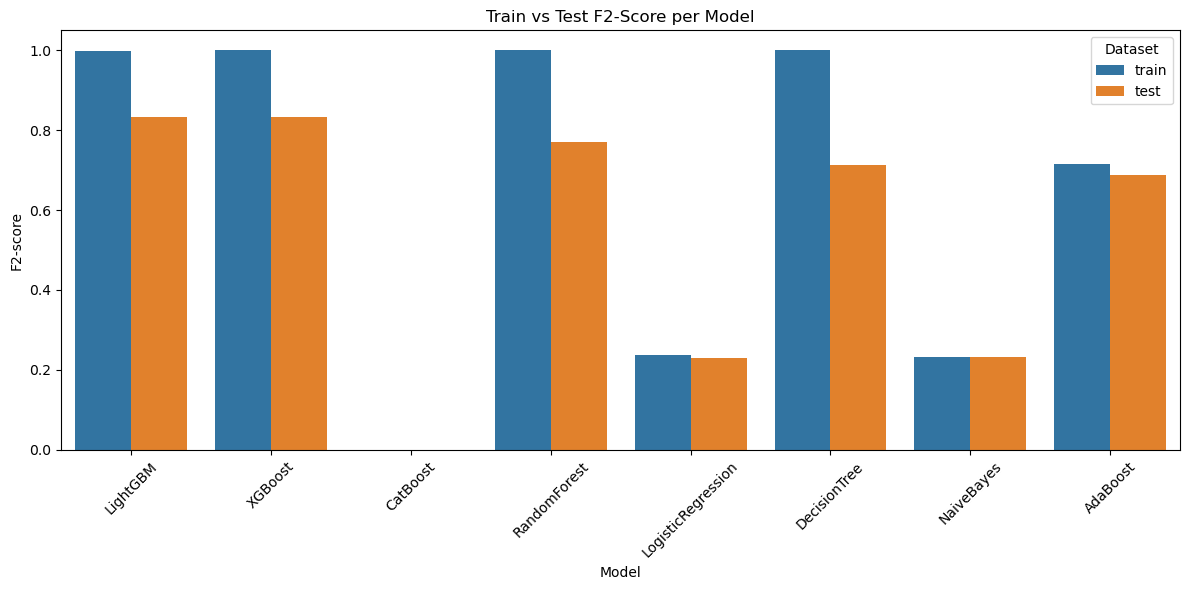


Selected top 5 models for hyperparameter tuning: ['XGBoost', 'LightGBM', 'CatBoost', 'RandomForest', 'DecisionTree']


In [ ]:
# vanilla_results, top_models = evaluate_vanilla_models_with_plot(X_train, y_train, vanilla_models)


In [70]:
def evaluate_vanilla_models_with_metrics_df(X, y, models):
    print("=" * 60)
    print("VANILLA MODEL EVALUATION (Full Metrics as DataFrame)")
    print("=" * 60)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    records = []

    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        try:
            scores = cross_validate(
                model, X, y, cv=cv,
                scoring=Scoring_vanilla_models,
                return_train_score=True,
                n_jobs=-1
            )

            for metric in Scoring_vanilla_models:
                for dataset in ['train', 'test']:
                    key = f"{dataset}_{metric}"
                    mean = scores[key].mean()
                    std = scores[key].std()

                    records.append({
                        'model': name,
                        'metric': metric,
                        'dataset': dataset,
                        'mean': mean,
                        'std': std
                    })

                # Print just the test F2 for logging
                if metric == 'f2':
                    print(f"  F2-score (test): {scores['test_f2'].mean():.4f} ± {scores['test_f2'].std():.4f}")

        except Exception as e:
            print(f"  Error evaluating {name}: {e}")
            continue

    df_results = pd.DataFrame(records)

    # Filter only test F2-scores for ranking
    df_f2 = df_results[(df_results['metric'] == 'f2') & (df_results['dataset'] == 'test')].dropna()
    df_f2_sorted = df_f2.sort_values(by='mean', ascending=False)

    print("\n" + "=" * 60)
    print("MODEL RANKINGS (by Test F2-score)")
    print("=" * 60)
    for i, row in enumerate(df_f2_sorted.itertuples(), 1):
        print(f"{i:2d}. {row.model:15s}: F2 = {row.mean:.4f} ± {row.std:.4f}")

    # Plot F2 train vs test
    df_plot = df_results[df_results['metric'] == 'f2']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_plot, x='model', y='mean', hue='dataset', errorbar=None)
    plt.title("Train vs Test F2-Score per Model")
    plt.ylabel("F2-score")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

    # Get top 5 model names by F2
    top_models = df_f2_sorted['model'].tolist()[:5]
    print(f"\nSelected top 5 models for hyperparameter tuning: {top_models}")

    return df_results, top_models


VANILLA MODEL EVALUATION (Full Metrics as DataFrame)

Evaluating CatBoost...
  F2-score (test): 0.8243 ± 0.0294

Evaluating LightGBM...
  F2-score (test): 0.8340 ± 0.0278

Evaluating XGBoost...
  F2-score (test): 0.8340 ± 0.0267

Evaluating RandomForest...
  F2-score (test): 0.7702 ± 0.0585

Evaluating LogisticRegression...
  F2-score (test): 0.2302 ± 0.0152

Evaluating DecisionTree...
  F2-score (test): 0.7117 ± 0.0516

Evaluating NaiveBayes...
  F2-score (test): 0.2312 ± 0.0054

Evaluating AdaBoost...
  F2-score (test): 0.6881 ± 0.0269

MODEL RANKINGS (by Test F2-score)
 1. XGBoost        : F2 = 0.8340 ± 0.0267
 2. LightGBM       : F2 = 0.8340 ± 0.0278
 3. CatBoost       : F2 = 0.8243 ± 0.0294
 4. RandomForest   : F2 = 0.7702 ± 0.0585
 5. DecisionTree   : F2 = 0.7117 ± 0.0516
 6. AdaBoost       : F2 = 0.6881 ± 0.0269
 7. NaiveBayes     : F2 = 0.2312 ± 0.0054
 8. LogisticRegression: F2 = 0.2302 ± 0.0152


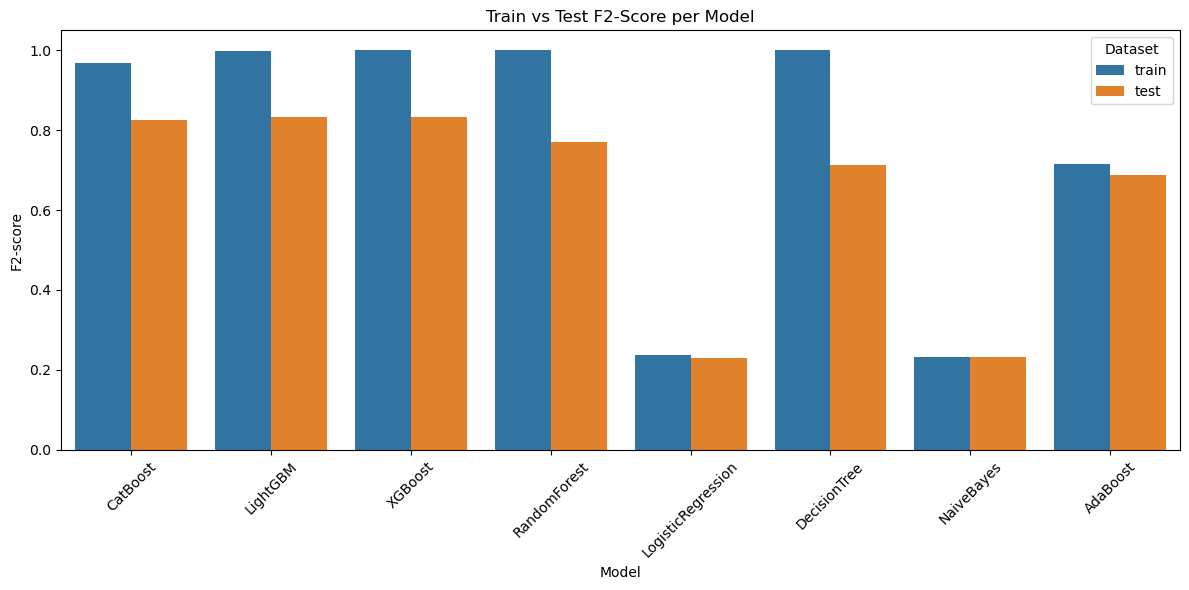


Selected top 5 models for hyperparameter tuning: ['XGBoost', 'LightGBM', 'CatBoost', 'RandomForest', 'DecisionTree']


In [76]:
df_scores, top_models = evaluate_vanilla_models_with_metrics_df(X_train, y_train, vanilla_models)


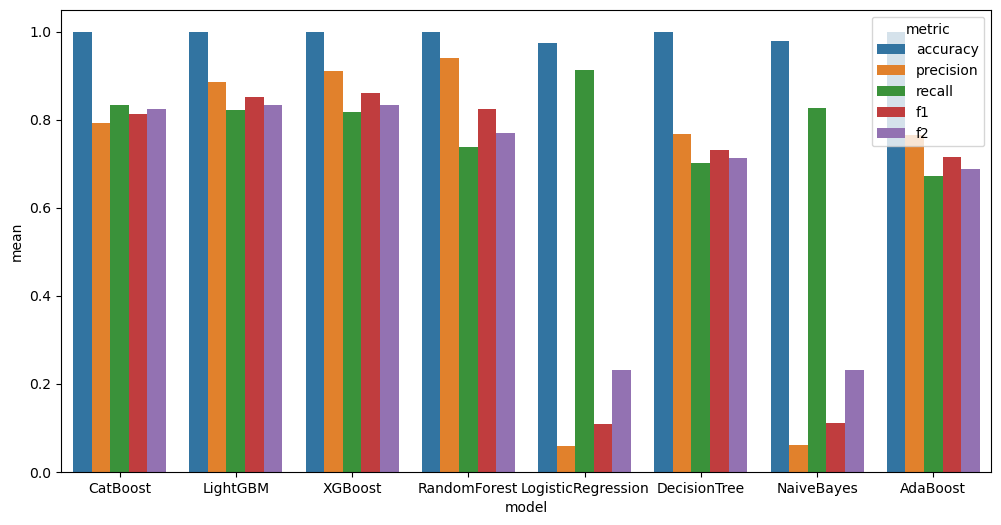

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_scores[df_scores['dataset'] == 'test'], x='model', y='mean', hue='metric');


In [59]:
df_scores[df_scores['model'] == 'LightGBM']

,model,metric,dataset,mean,std
0,LightGBM,accuracy,train,0.999982,0.000003
1,LightGBM,accuracy,test,0.999524,0.000066
2,LightGBM,precision,train,0.989532,0.001834
3,LightGBM,precision,test,0.885343,0.035552
4,LightGBM,recall,train,1.000000,0.000000
5,LightGBM,recall,test,0.822751,0.035690
6,LightGBM,f1,train,0.994738,0.000926
7,LightGBM,f1,test,0.851953,0.020603
8,LightGBM,f2,train,0.997888,0.000373
9,LightGBM,f2,test,0.833983,0.027847


In [57]:
df_scores[(df_scores['metric'] == 'recall') | (df_scores['metric'] == 'precision')].sort_values(by='mean', ascending=False)


,model,metric,dataset,mean,std
4,LightGBM,recall,train,1.000000,0.000000
24,RandomForest,recall,train,1.000000,0.000000
14,XGBoost,recall,train,1.000000,0.000000
12,XGBoost,precision,train,1.000000,0.000000
22,RandomForest,precision,train,1.000000,0.000000
44,DecisionTree,recall,train,1.000000,0.000000
42,DecisionTree,precision,train,1.000000,0.000000
2,LightGBM,precision,train,0.989532,0.001834
23,RandomForest,precision,test,0.940086,0.012116
34,LogisticRegression,recall,train,0.932540,0.009720


In [80]:
top_models

['XGBoost', 'LightGBM', 'CatBoost', 'RandomForest', 'DecisionTree']

In [ ]:
# # Vanilla Models Evaluation
# def evaluate_vanilla_models(X,y,models):
#     print("="*30)
#     print("VANILLA MODELS EVALUATION")
#     print("="*30)

#     results = {}

#     for name,model in models.items():
#         print(f"\nEvaluating {name}...")

#         try:
#             results[name] = cross_validate(
#                 model,
#                 X,
#                 y,
#                 scoring= Scoring_vanilla_models,
#                 return_train_score= True,
#                 n_jobs=-1
#             )
#         except Exception as e:
#             print(f"Error: {e}")

#     # Sort by recall
#     sorted_results = sorted(results.items(), key=lambda x: x[1]['recall_mean'], reverse=True)
        

        

Now we will perform hyperparameter tuning for these models. <br>
There are two approaches that we can follow:
- Sequential
- Simulatneous hyperparameter tuning and threshold tuning


Approach 1: Sequential

In [78]:
# Create custom F2 scorer
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, zero_division=0)

# Create custom scoring dictionary
scoring_dict = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'f2': make_scorer(f2_score)
}

# Primary scorer for threshold tuning
f2_scorer = make_scorer(f2_score)

In [79]:
def create_optuna_objective(model_name, X_train, y_train, X_val, y_val):
    """Create Optuna objective function for each model"""
    
    def objective(trial):
        if model_name == 'LightGBM':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 15),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'num_leaves': trial.suggest_int('num_leaves', 10, 300),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1,
                'verbose': -1
            }
            model = LGBMClassifier(**params)
            
        elif model_name == 'XGBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'scale_pos_weight': pos_weight,
                'random_state': 42,
                'n_jobs': -1,
                'verbosity': 0
            }
            model = XGBClassifier(**params)
            
        elif model_name == 'CatBoost':
            params = {
                'iterations': trial.suggest_int('iterations', 50, 300),
                'depth': trial.suggest_int('depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'class_weights': [1, pos_weight],
                'random_state': 42
            }
            model = CatBoostClassifier(**params)
            
        elif model_name == 'RandomForest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                'max_depth': trial.suggest_int('max_depth', 5, 25),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1
            }
            model = RandomForestClassifier(**params)
            
        elif model_name == 'LogisticRegression':
            params = {
                'C': trial.suggest_float('C', 0.001, 100, log=True),
                'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet']),
                'solver': 'saga',
                'class_weight': 'balanced',
                'max_iter': 1000,
                'random_state': 42,
                'n_jobs': -1
            }
            if params['penalty'] == 'elasticnet':
                params['l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)
            model = LogisticRegression(**params)
            
        elif model_name == 'DecisionTree':
            params = {
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'class_weight': 'balanced',
                'random_state': 42
            }
            model = DecisionTreeClassifier(**params)
            
        elif model_name == 'AdaBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 2.0),
                'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
                'random_state': 42
            }
            model = AdaBoostClassifier(**params)
            
        else:  # NaiveBayes - no hyperparameters to tune
            model = GaussianNB()
        
        # Train and evaluate
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        # Use F2 score for optimization (emphasizes recall)
        score = fbeta_score(y_val, y_pred, beta=2, zero_division=0)
        return score
    
    return objective

def optimize_hyperparameters(model_name, X, y, n_trials=50):
    """Optimize hyperparameters using Optuna"""
    print(f"\nOptimizing {model_name} with Optuna ({n_trials} trials)...")
    
    # Create train/validation split for hyperparameter tuning
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create and run study
    study = optuna.create_study(direction='maximize')
    objective = create_optuna_objective(model_name, X_train, y_train, X_val, y_val)
    study.optimize(objective, n_trials=n_trials)
    
    print(f"  Best F2 score: {study.best_value:.4f}")
    print(f"  Best params: {study.best_params}")
    
    return study.best_params, study.best_value

In [85]:
for model_name in top_models:
    print(vanilla_models[model_name])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)
LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42, verbose=-1)
RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
DecisionTreeClassifier(class_weight='balanced', random_state=42)


In [86]:
import time
from datetime import datetime

print(f"\n{'='*80}")
print("HYPERPARAMETER OPTIMIZATION (OPTUNA)")
print(f"{'='*80}")

optimized_models = {}
total_start_time = time.time()

for model_name in top_models:
    print(f"\nOptimizing {model_name}...")
    model_start_time = time.time()
    
    try:
        best_params, best_score = optimize_hyperparameters(
            model_name, X_train, y_train, n_trials=30  # Reduced for speed
        )
        
        # Create optimized model - get from vanilla_models dictionary
        base_model = vanilla_models[model_name]
        optimized_model = base_model.set_params(**best_params)
        
        model_end_time = time.time()
        model_duration = model_end_time - model_start_time
        
        optimized_models[model_name] = {
            'model': optimized_model,
            'params': best_params,
            'score': best_score,
            'optimization_time': model_duration
        }
        
        print(f"✓ {model_name} optimization completed in {model_duration:.2f} seconds")
        print(f"  Best score: {best_score:.4f}")
        print(f"  Best params: {best_params}")
        
    except Exception as e:
        model_end_time = time.time()
        model_duration = model_end_time - model_start_time
        
        print(f"✗ Error optimizing {model_name}: {e}")
        print(f"  Using vanilla model as fallback (took {model_duration:.2f} seconds)")
        
        # Use vanilla model as fallback
        optimized_models[model_name] = {
            'model': vanilla_models[model_name],
            'params': {},
            'score': None,  # We don't have a score for failed optimization
            'optimization_time': model_duration
        }

total_end_time = time.time()
total_duration = total_end_time - total_start_time

print(f"\n{'='*80}")
print("OPTIMIZATION SUMMARY")
print(f"{'='*80}")
print(f"Total optimization time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")
print(f"Successfully optimized: {len([m for m in optimized_models.values() if m['score'] is not None])}/{len(top_models)} models")

# Display timing breakdown
print(f"\nTiming breakdown:")
for model_name, model_info in optimized_models.items():
    status = "✓" if model_info['score'] is not None else "✗"
    print(f"  {status} {model_name}: {model_info['optimization_time']:.2f}s")

print(f"\nOptimized models ready for evaluation!")


HYPERPARAMETER OPTIMIZATION (OPTUNA)

Optimizing XGBoost...

Optimizing XGBoost with Optuna (30 trials)...
  Best F2 score: 0.8784
  Best params: {'n_estimators': 263, 'max_depth': 6, 'learning_rate': 0.20427892688750104, 'subsample': 0.8689748765727056, 'colsample_bytree': 0.8653570406005219, 'min_child_weight': 2}
✓ XGBoost optimization completed in 171.80 seconds
  Best score: 0.8784
  Best params: {'n_estimators': 263, 'max_depth': 6, 'learning_rate': 0.20427892688750104, 'subsample': 0.8689748765727056, 'colsample_bytree': 0.8653570406005219, 'min_child_weight': 2}

Optimizing LightGBM...

Optimizing LightGBM with Optuna (30 trials)...
  Best F2 score: 0.8760
  Best params: {'n_estimators': 212, 'max_depth': 10, 'learning_rate': 0.14204141690527244, 'num_leaves': 245, 'min_child_samples': 18, 'subsample': 0.9708379969345187, 'colsample_bytree': 0.5441333943181879}
✓ LightGBM optimization completed in 160.04 seconds
  Best score: 0.8760
  Best params: {'n_estimators': 212, 'max_de

In [87]:
optimized_models

{'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8653570406005219, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.20427892688750104,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=6, max_leaves=None,
                min_child_weight=2, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=263, n_jobs=-1,
                num_parallel_tree=None, ...),
  'params': {'n_estimators': 263,
   'max_depth': 6,
   'learning_rate': 0.20427892688750104,
   'subsample': 0.8689748765727056,
   'colsample_bytree': 0.86535

In [102]:
def threshold_tuning(X_train, y_train, model, model_name, cv_folds=3):
    """
    Tune threshold using cross-validation on training data only.
    Returns only best threshold and best score (F2).
    """
    print(f"\nThreshold tuning for {model_name}...")

    tuner = TunedThresholdClassifierCV(
        estimator=model,
        scoring=f2_scorer,  # make sure this is defined globally
        cv=cv_folds,
        random_state=42
    )
    
    tuner.fit(X_train, y_train)

    return {
        'best_threshold': tuner.best_threshold_,
        'cv_f2_score': tuner.best_score_
    }


In [103]:
def compare_threshold_tuned_models(X_train, y_train, models_dict):
    """
    Tune thresholds for each model and collect best threshold and F2 score.
    """
    print("=" * 60)
    print("THRESHOLD TUNING FOR ALL MODELS")
    print("=" * 60)
    
    summary = {}

    for model_name, model in models_dict.items():
        result = threshold_tuning(X_train, y_train, model, model_name)
        summary[model_name] = result

    print("\n" + "=" * 60)
    print("THRESHOLD TUNING SUMMARY")
    print("=" * 60)
    print(f"{'Model':<20} {'Best Threshold':<16} {'CV F2 Score':<12}")
    print("-" * 60)

    for name, res in summary.items():
        print(f"{name:<20} {res['best_threshold']:<16.4f} {res['cv_f2_score']:<12.4f}")

    return summary


In [100]:
tuning_model_dict = {name: details['model'] for name,details in optimized_models.items()}
tuning_model_dict

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8653570406005219, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.20427892688750104,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=2, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=263, n_jobs=-1,
               num_parallel_tree=None, ...),
 'LightGBM': LGBMClassifier(class_weight='balanced', colsample_bytree=0.5441333943181879,
                learning_rate=0.14204141690527244, max_depth=10,
                min_child_

In [104]:
# Run simplified comparison
threshold_summary = compare_threshold_tuned_models(X_train, y_train, tuning_model_dict)

THRESHOLD TUNING FOR ALL MODELS

Threshold tuning for XGBoost...

Threshold tuning for LightGBM...

Threshold tuning for CatBoost...
0:	learn: 0.3710639	total: 297ms	remaining: 1m 28s
1:	learn: 0.1971982	total: 615ms	remaining: 1m 31s
2:	learn: 0.1161154	total: 924ms	remaining: 1m 31s
3:	learn: 0.0746389	total: 1.15s	remaining: 1m 25s
4:	learn: 0.0509745	total: 1.4s	remaining: 1m 22s
5:	learn: 0.0405409	total: 1.64s	remaining: 1m 20s
6:	learn: 0.0313174	total: 1.97s	remaining: 1m 22s
7:	learn: 0.0264369	total: 2.3s	remaining: 1m 23s
8:	learn: 0.0199793	total: 2.63s	remaining: 1m 25s
9:	learn: 0.0160421	total: 2.96s	remaining: 1m 25s
10:	learn: 0.0125635	total: 3.3s	remaining: 1m 26s
11:	learn: 0.0102353	total: 3.63s	remaining: 1m 27s
12:	learn: 0.0086109	total: 3.97s	remaining: 1m 27s
13:	learn: 0.0074830	total: 4.28s	remaining: 1m 27s
14:	learn: 0.0064742	total: 4.6s	remaining: 1m 27s
15:	learn: 0.0057467	total: 4.92s	remaining: 1m 27s
16:	learn: 0.0049536	total: 5.22s	remaining: 1m 2

In [105]:
threshold_summary

{'XGBoost': {'best_threshold': np.float32(0.23232323),
  'cv_f2_score': np.float64(0.8403050566840072)},
 'LightGBM': {'best_threshold': np.float64(0.010101010098986847),
  'cv_f2_score': np.float64(0.8460017000941221)},
 'CatBoost': {'best_threshold': np.float64(0.31312847216079875),
  'cv_f2_score': np.float64(0.8294992804612354)},
 'RandomForest': {'best_threshold': np.float64(0.3232177207273139),
  'cv_f2_score': np.float64(0.8275217066610808)},
 'DecisionTree': {'best_threshold': np.float64(0.98989898989899),
  'cv_f2_score': np.float64(0.7328527241523909)}}

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get the best model and threshold
best_model_name = 'LightGBM'  # or use your variable from the threshold tuning summary
best_model = tuning_model_dict[best_model_name]
best_threshold = threshold_summary[best_model_name]['best_threshold']

# Step 2: Fit the model on the full training data if not already done
best_model.fit(X_train, y_train)

# Step 3: Predict probabilities on test data
y_proba_test = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Step 4: Apply the best threshold
y_pred_test = (y_proba_test >= best_threshold).astype(int)






In [107]:
# Step 5: Evaluate using confusion matrix and classification report
print(f"\nClassification Report for {best_model_name} (Threshold = {best_threshold:.4f}):")
print(classification_report(y_test, y_pred_test, zero_division=0, digits=4))


Classification Report for LightGBM (Threshold = 0.0101):
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56651
           1     0.9136    0.7789    0.8409        95

    accuracy                         0.9995     56746
   macro avg     0.9566    0.8894    0.9203     56746
weighted avg     0.9995    0.9995    0.9995     56746



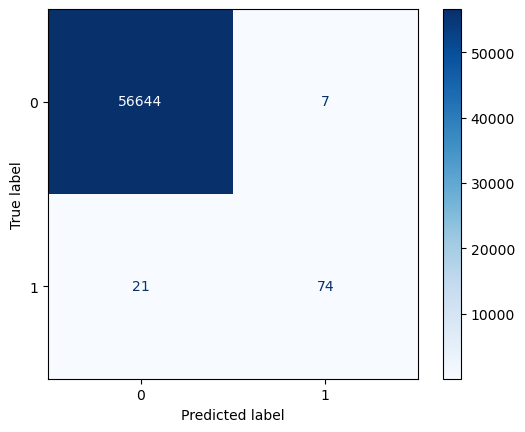

In [108]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

In [109]:
from sklearn.metrics import confusion_matrix, make_scorer

def fraud_cost_function(y_true, y_pred):
    """
    Custom cost function for credit card fraud detection.
    High penalty for False Negatives, moderate penalty for False Positives.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Define costs
    cost_fn = 50
    cost_fp = 5

    total_cost = fn * cost_fn + fp * cost_fp

    return -total_cost  # We negate because higher is better in scikit-learn scoring

# Wrap into a scorer for model selection or threshold tuning
cost_scorer = make_scorer(fraud_cost_function, greater_is_better=True)


In [110]:
def threshold_tuning2(X_train, y_train, model, model_name, cv_folds=3):
    """
    Tune threshold using cross-validation on training data only.
    Returns only best threshold and best score (F2).
    """
    print(f"\nThreshold tuning for {model_name}...")

    tuner = TunedThresholdClassifierCV(
        estimator=model,
        scoring=cost_scorer,  # make sure this is defined globally
        cv=cv_folds,
        random_state=42
    )
    
    tuner.fit(X_train, y_train)

    return {
        'best_threshold': tuner.best_threshold_,
        'cv_f2_score': tuner.best_score_
    }


In [111]:
def compare_threshold_tuned_models2(X_train, y_train, models_dict):
    """
    Tune thresholds for each model and collect best threshold and F2 score.
    """
    print("=" * 60)
    print("THRESHOLD TUNING FOR ALL MODELS")
    print("=" * 60)
    
    summary = {}

    for model_name, model in models_dict.items():
        result = threshold_tuning2(X_train, y_train, model, model_name)
        summary[model_name] = result

    print("\n" + "=" * 60)
    print("THRESHOLD TUNING SUMMARY")
    print("=" * 60)
    print(f"{'Model':<20} {'Best Threshold':<16} {'CV F2 Score':<12}")
    print("-" * 60)

    for name, res in summary.items():
        print(f"{name:<20} {res['best_threshold']:<16.4f} {res['cv_f2_score']:<12.4f}")

    return summary


In [112]:
# Run simplified comparison
threshold_summary2 = compare_threshold_tuned_models2(X_train, y_train, tuning_model_dict)

THRESHOLD TUNING FOR ALL MODELS

Threshold tuning for XGBoost...

Threshold tuning for LightGBM...

Threshold tuning for CatBoost...
0:	learn: 0.3710639	total: 326ms	remaining: 1m 37s
1:	learn: 0.1971982	total: 537ms	remaining: 1m 20s
2:	learn: 0.1161154	total: 786ms	remaining: 1m 17s
3:	learn: 0.0746389	total: 1.02s	remaining: 1m 15s
4:	learn: 0.0509745	total: 1.36s	remaining: 1m 20s
5:	learn: 0.0405409	total: 1.72s	remaining: 1m 24s
6:	learn: 0.0313174	total: 2.08s	remaining: 1m 27s
7:	learn: 0.0264369	total: 2.4s	remaining: 1m 27s
8:	learn: 0.0199793	total: 2.73s	remaining: 1m 28s
9:	learn: 0.0160421	total: 3.08s	remaining: 1m 29s
10:	learn: 0.0125635	total: 3.42s	remaining: 1m 29s
11:	learn: 0.0102353	total: 3.75s	remaining: 1m 29s
12:	learn: 0.0086109	total: 4.11s	remaining: 1m 30s
13:	learn: 0.0074830	total: 4.44s	remaining: 1m 30s
14:	learn: 0.0064742	total: 4.74s	remaining: 1m 30s
15:	learn: 0.0057467	total: 5.04s	remaining: 1m 29s
16:	learn: 0.0049536	total: 5.35s	remaining: 1

In [113]:
threshold_summary2

{'XGBoost': {'best_threshold': np.float32(0.23232323),
  'cv_f2_score': np.float64(-1145.0)},
 'LightGBM': {'best_threshold': np.float64(0.010101010098986847),
  'cv_f2_score': np.float64(-1090.0001289575284)},
 'CatBoost': {'best_threshold': np.float64(0.31312847216079875),
  'cv_f2_score': np.float64(-1143.333428439107)},
 'RandomForest': {'best_threshold': np.float64(0.19191052168184264),
  'cv_f2_score': np.float64(-1133.3554293766024)},
 'DecisionTree': {'best_threshold': np.float64(0.98989898989899),
  'cv_f2_score': np.float64(-1748.3333333333333)}}

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get the best model and threshold
best_model_name = 'LightGBM'  # or use your variable from the threshold tuning summary
best_model = tuning_model_dict[best_model_name]
best_threshold = threshold_summary2[best_model_name]['best_threshold']

# Step 2: Fit the model on the full training data if not already done
best_model.fit(X_train, y_train)

# Step 3: Predict probabilities on test data
y_proba_test = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Step 4: Apply the best threshold
y_pred_test = (y_proba_test >= best_threshold).astype(int)





In [115]:
# Step 5: Evaluate using confusion matrix and classification report
print(f"\nClassification Report for {best_model_name} (Threshold = {best_threshold:.4f}):")
print(classification_report(y_test, y_pred_test, zero_division=0, digits=4))




Classification Report for LightGBM (Threshold = 0.0101):
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56651
           1     0.9136    0.7789    0.8409        95

    accuracy                         0.9995     56746
   macro avg     0.9566    0.8894    0.9203     56746
weighted avg     0.9995    0.9995    0.9995     56746



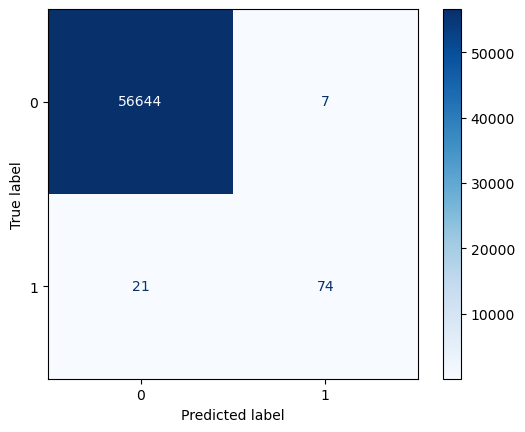

In [116]:

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

open the follwoing: 
- https://colab.research.google.com/drive/1Z-Uf1NU1rH2HJykA3eQzxsOo4BUI_PWL?authuser=1#scrollTo=FsLymRrrJk6y
- https://colab.research.google.com/drive/1dAyJAOj1ZinehSNdLMRiy0l6xKF-0AMf?authuser=1#scrollTo=HlXDMUtyHXS5 

Just do it vanilaa with recall and tuning with cost function,also check teh nested one and do it on colab to use GPUs,teh just finish it 

In [ ]:
def threshold_tuning(X_train, y_train, model, model_name, cv_folds=3, scoring='f2'):
    """
    Tune threshold using cross-validation on training data only.
    
    Parameters:
    -----------
    X_train : pd.DataFrame
        Training features (your already split training data)
    y_train : pd.Series  
        Training labels (your already split training data)
    model : sklearn estimator
        Already hyperparameter-tuned model
    model_name : str
        Name for logging
    cv_folds : int, default=3
        Number of CV folds for threshold tuning
    scoring : str, default='f2'
        Scoring metric for threshold optimization
        
    Returns:
    --------
    dict : Contains the fitted tuner and CV performance metrics
    """
    print(f"\nThreshold tuning for {model_name}...")
    
    # Create the threshold tuner
    tuner = TunedThresholdClassifierCV(
        estimator=model,
        scoring=f2_scorer,  # or make this configurable
        cv=cv_folds,
        random_state=42
    )
    
    # Fit the tuner on training data
    tuner.fit(X_train, y_train)
    
    # Get predictions on training data using best threshold
    y_pred = tuner.predict(X_train)
    
    # Calculate metrics on training data (for reference only)
    try:
        train_metrics = {
            'accuracy': accuracy_score(y_train, y_train_pred),
            'precision': precision_score(y_train, y_train_pred, zero_division=0),
            'recall': recall_score(y_train, y_train_pred, zero_division=0),
            'f1': f1_score(y_train, y_train_pred, zero_division=0),
            'f2': f2_score(y_train, y_train_pred),
        }
    except Exception as e:
        print(f"    Error calculating training metrics: {e}")
        train_metrics = {
            'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'f2': 0.0
        }
    
    # Results dictionary
    results = {
        'model_name': model_name,
        'tuned_model': tuner,  # This is what you'll use for final testing
        'best_threshold': tuner.best_threshold_,
        'cv_score': tuner.best_score_,  # CV score used for threshold selection
        'train_metrics': train_metrics,  # Training performance (for reference)
        'cv_results': cv_scores  # Detailed CV results
    }
    
    print(f"    Best threshold: {tuner.best_threshold_:.4f}")
    print(f"    CV score (F2): {tuner.best_score_:.4f}")
    print(f"    Training metrics - Acc: {train_metrics['accuracy']:.4f}, "
          f"Prec: {train_metrics['precision']:.4f}, "
          f"Rec: {train_metrics['recall']:.4f}, "
          f"F1: {train_metrics['f1']:.4f}, "
          f"F2: {train_metrics['f2']:.4f}")
    
    return results


def compare_threshold_tuned_models(X_train, y_train, models_dict):
    """
    Compare multiple models after threshold tuning.
    
    Parameters:
    -----------
    X_train : pd.DataFrame
        Training features
    y_train : pd.Series
        Training labels  
    models_dict : dict
        Dictionary of {model_name: fitted_model}
        
    Returns:
    --------
    dict : Results for all models with best model identified
    """
    print("=" * 60)
    print("THRESHOLD TUNING FOR ALL MODELS")
    print("=" * 60)
    
    all_results = {}
    
    # Tune threshold for each model
    for model_name, model in models_dict.items():
        results = threshold_tuning(X_train, y_train, model, model_name)
        all_results[model_name] = results
    
    # Find best model based on CV F2 score
    best_model_name = max(all_results.keys(), 
                         key=lambda x: all_results[x]['cv_score'])
    
    print("\n" + "=" * 60)
    print("THRESHOLD TUNING SUMMARY")
    print("=" * 60)
    
    # Print comparison table
    print(f"{'Model':<20} {'Threshold':<12} {'CV F2':<10} {'Train F2':<10}")
    print("-" * 60)
    
    for model_name, results in all_results.items():
        marker = " 🏆" if model_name == best_model_name else ""
        print(f"{model_name:<20} {results['best_threshold']:<12.4f} "
              f"{results['cv_score']:<10.4f} "
              f"{results['train_metrics']['f2']:<10.4f}{marker}")
    
    print(f"\nBest model: {best_model_name}")
    
    return {
        'all_results': all_results,
        'best_model_name': best_model_name,
        'best_model': all_results[best_model_name]['tuned_model']
    }




In [101]:
# Tune thresholds for all models
comparison_results = compare_threshold_tuned_models(X_train, y_train, tuning_model_dict)

THRESHOLD TUNING FOR ALL MODELS

Threshold tuning for XGBoost...


AttributeError: 'TunedThresholdClassifierCV' object has no attribute 'cv_results_'

In [ ]:
# Example usage:
"""
# Your workflow:
models = {
    'RandomForest': best_rf_model,      # Already hyperparameter tuned
    'XGBoost': best_xgb_model,          # Already hyperparameter tuned  
    'LogisticRegression': best_lr_model, # Already hyperparameter tuned
    'SVM': best_svm_model,              # Already hyperparameter tuned
    'GradientBoosting': best_gb_model   # Already hyperparameter tuned
}



# Get the best model with tuned threshold
best_tuned_model = comparison_results['best_model']

# Now test on your held-out test set
y_test_pred = best_tuned_model.predict(X_test)
test_f2 = f2_score(y_test, y_test_pred)
print(f"Final test F2 score: {test_f2:.4f}")
"""

In [ ]:

def threshold_tuning(X, y, model, model_name):
    """Nested CV with threshold tuning"""
    print(f"\nNested CV for {model_name}...")
    
    outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    results = []
    
    for fold, (train_idx, val_idx) in enumerate(outer_cv.split(X, y)):
        print(f"  Fold {fold + 1}/3")
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
          
        tuner = TunedThresholdClassifierCV(
                estimator=model,
                scoring=f2_scorer,
                cv=3,
                random_state=42
            )
        
        # Fit threshold tuner
        tuner.fit(X_train, y_train)
        
        # Predict on validation set
        y_pred = tuner.predict(X_val)
        
        # Calculate all metrics
        try:
            accuracy = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred, zero_division=0)
            recall = recall_score(y_val, y_pred, zero_division=0)
            f1 = f1_score(y_val, y_pred, zero_division=0)
            f2 = f2_score(y_val, y_pred)
                
        except Exception as e:
            print(f"    Error calculating metrics: {e}")
            accuracy = precision = recall = f1 = f2 = 0.0
        
        results.append({
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'f2': f2,
            'threshold': tuner.best_threshold_ if hasattr(tuner, 'best_threshold_') else 0.5
        })
        
        print(f"    Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")
    
    # Aggregate results
    avg_results = {
        'model': model_name,
        'avg_accuracy': np.mean([r['accuracy'] for r in results]),
        'avg_precision': np.mean([r['precision'] for r in results]),
        'avg_recall': np.mean([r['recall'] for r in results]),
        'avg_f1': np.mean([r['f1'] for r in results]),
        'avg_f2': np.mean([r['f2'] for r in results]),
        'std_accuracy': np.std([r['accuracy'] for r in results]),
        'std_precision': np.std([r['precision'] for r in results]),
        'std_recall': np.std([r['recall'] for r in results]),
        'std_f1': np.std([r['f1'] for r in results]),
        'std_f2': np.std([r['f2'] for r in results]),
        'avg_threshold': np.mean([r['threshold'] for r in results])
    }
    
    return avg_results


In [ ]:
print(f"\n{'='*80}")
print("HYPERPARAMETER OPTIMIZATION (OPTUNA)")
print(f"{'='*80}")

optimized_models = {}

for model_name in top_models:
    try:
        best_params, best_score = optimize_hyperparameters(
            model_name, X_train, y_train, n_trials=30  # Reduced for speed
        )
        
        # Create optimized model
        base_model = vanilla_models[model_name]
        optimized_model = base_model.set_params(**best_params)
        
        optimized_models[model_name] = {
            'model': optimized_model,
            'params': best_params,
            'score': best_score
        }
        
    except Exception as e:
        print(f"Error optimizing {model_name}: {e}")
        # Use vanilla model as fallback
        optimized_models[model_name] = {
            'model': vanilla_models[model_name],
            'params': {},
            'score': df_scores[(df_scores['model'] == model_name) & (df_scores['metric'] == 'f2') & (df_scores['dataset'] == 'test')]['mean']
        }


HYPERPARAMETER OPTIMIZATION (OPTUNA)

Optimizing XGBoost with Optuna (30 trials)...
  Best F2 score: 0.8800
  Best params: {'n_estimators': 234, 'max_depth': 8, 'learning_rate': 0.09774695090133106, 'subsample': 0.7905650943648398, 'colsample_bytree': 0.9948613546253335, 'min_child_weight': 6}
Error optimizing XGBoost: list indices must be integers or slices, not str


TypeError: list indices must be integers or slices, not str

In [26]:
# # Define the hyper-parameter grid for the models
# param_grids = {
#     'XGBClassifier': {
#         'estimator__n_estimators': [50, 100],
#         'estimator__max_depth': [3, 6],
#         'estimator__learning_rate': [0.05, 0.1],
#         'estimator__subsample': [0.8, 1.0]
#     },
#     'RandomForestClassifier': {
#         'estimator__n_estimators': [50, 100],
#         'estimator__max_depth': [10, None],
#         'estimator__min_samples_split': [2, 5],
#         'estimator__min_samples_leaf': [1, 2]
#     },
#     'DecisionTreeClassifier': {
#         'estimator__max_depth': [5, 10, None],
#         'estimator__min_samples_split': [2, 10],
#         'estimator__min_samples_leaf': [1, 5],
#         'estimator__criterion': ['gini', 'entropy']
#     }
# }


In [25]:
# Define the hyper-parameter grid for the models
param_grids = {
    'XGBClassifier': {
        'estimator__n_estimators': [50, 100],
        'estimator__max_depth': [3, 6],
        'estimator__subsample': [0.8, 1.0]
    },
    'RandomForestClassifier': {
        'estimator__n_estimators': [50] , # 100],
        'estimator__max_depth': [15], #30],
        'estimator__min_samples_leaf': [2], # 5]
    },
    'DecisionTreeClassifier': {
        'estimator__max_depth': [5, 10, 15],
        'estimator__min_samples_split': [2, 10],
        'estimator__criterion': ['gini', 'entropy']
    }
}


In [26]:
param_grids['RandomForestClassifier']

{'estimator__n_estimators': [50],
 'estimator__max_depth': [15],
 'estimator__min_samples_leaf': [2]}

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

In [ ]:
# Fixed cost scorer - works with binary predictions
def cost_sensitive_score(y_true, y_pred):
    """Cost-sensitive scoring function that works with binary predictions"""
    # Ensure binary predictions
    y_pred_binary = (y_pred > 0.5).astype(int) if y_pred.dtype == float else y_pred

    # Safe confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary, labels=[0, 1])
    if cm.shape != (2, 2):
        return -1e6  # Huge cost if classes are missing

    tn, fp, fn, tp = cm.ravel()
    cost = (fn * 1000) + (fp * 100)  # False negatives cost more
    return -cost  # Negative because sklearn maximizes scores

In [29]:
# Create the F2 scorer outside the loop
f2_scorer = make_scorer(lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2.0))

In [30]:
# Scoring metrics
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1',
    'f2': f2_scorer,
    'roc_auc': 'roc_auc',
    'cost': cost_scorer
}

In [31]:
approach1_results = {}

In [32]:
for name in top_3_names:
    print("="*60)
    print(f"Tuning {name} with threshold optimization...")

    # Create threshold-tuned wrapper
    base_model = vanilla_models[name]

    threshold_tuned_model = TunedThresholdClassifierCV(
        estimator=base_model,
        scoring=f2_scorer,  # Optimize threshold for F1-score
        cv=3                # Inner CV for threshold tuning
    )

    print("- Starting hyperparameter search...")
    # Grid search over hyperparameters
    grid_search = GridSearchCV(
        threshold_tuned_model,
        param_grids[name],
        cv=skf,  # Outer CV for hyperparameter tuning
        scoring=scoring,
        refit = 'recall',
        n_jobs=1,
        verbose=2
    )


    try:
        grid_search.fit(X_train,y_train)
    except ValueError as e:
        print(f"Search failed for {name}: {e}")
        continue

    print("- Hyperparameter tuning completed!")

    best_model = grid_search.best_estimator_
    best_threshold = best_model.best_threshold_

    print("Storing results...............")
    approach1_results[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_threshold': best_threshold,
        'cv_results': grid_search.cv_results_
    }

    print(f"  {name} Results:")
    print(f"  Best Recall-Score: {grid_search.best_score_:.4f}")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Best Threshold: {best_threshold:.4f}\n")
    print("="*60 + "\n")

Tuning RandomForestClassifier with threshold optimization...
- Starting hyperparameter search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\HP\anaconda3\envs\credit-fraud-detection\Lib\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: cost_sensitive_score() got an unexpected keyword argument 'needs_threshold'

  warnings.warn(


[CV] END estimator__max_depth=15, estimator__min_samples_leaf=2, estimator__n_estimators=50; total time= 1.6min


KeyboardInterrupt: 

In [40]:
# Select best model from Approach 1
best_approach1 = max(approach1_results.items(), key=lambda x: x[1]['best_score'])
print(f"Best model (Approach 1): {best_approach1[0]} with Recall = {best_approach1[1]['best_score']:.4f}")

Best model (Approach 1): XGBClassifier with Recall = 0.8224


In [41]:
best_model = approach1_results['XGBClassifier']

In [42]:
best_model['best_params']

{'estimator__max_depth': 6,
 'estimator__n_estimators': 100,
 'estimator__subsample': 0.8}

In [44]:
results_df = pd.DataFrame(best_model['cv_results'])
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,param_estimator__n_estimators,param_estimator__subsample,params,split0_test_recall,split1_test_recall,...,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_cost,split1_test_cost,split2_test_cost,mean_test_cost,std_test_cost,rank_test_cost
0,8.677383,0.250507,0.356591,0.073088,3,50,0.8,"{'estimator__max_depth': 3, 'estimator__n_esti...",0.818182,0.793893,...,0.985682,0.984065,0.001590,1,NaN,NaN,NaN,NaN,NaN,1
1,7.542447,0.224238,0.312301,0.064451,3,50,1.0,"{'estimator__max_depth': 3, 'estimator__n_esti...",0.795455,0.809160,...,0.983342,0.980414,0.002280,5,NaN,NaN,NaN,NaN,NaN,1
2,7.971310,0.388940,0.283644,0.009586,3,100,0.8,"{'estimator__max_depth': 3, 'estimator__n_esti...",0.803030,0.816794,...,0.984776,0.983583,0.001454,2,NaN,NaN,NaN,NaN,NaN,1
3,8.281690,0.931055,0.289362,0.015241,3,100,1.0,"{'estimator__max_depth': 3, 'estimator__n_esti...",0.803030,0.809160,...,0.984790,0.979670,0.004572,7,NaN,NaN,NaN,NaN,NaN,1
4,8.382612,0.283185,0.492212,0.275880,6,50,0.8,"{'estimator__max_depth': 6, 'estimator__n_esti...",0.795455,0.809160,...,0.980664,0.979554,0.002787,8,NaN,NaN,NaN,NaN,NaN,1
5,8.150280,0.353558,0.423138,0.212623,6,50,1.0,"{'estimator__max_depth': 6, 'estimator__n_esti...",0.787879,0.793893,...,0.984449,0.980225,0.005470,6,NaN,NaN,NaN,NaN,NaN,1
6,8.639301,0.094292,0.343701,0.090073,6,100,0.8,"{'estimator__max_depth': 6, 'estimator__n_esti...",0.795455,0.816794,...,0.979346,0.981048,0.001935,4,NaN,NaN,NaN,NaN,NaN,1
7,9.490094,0.741170,0.316810,0.100282,6,100,1.0,"{'estimator__max_depth': 6, 'estimator__n_esti...",0.795455,0.801527,...,0.987636,0.981512,0.004833,3,NaN,NaN,NaN,NaN,NaN,1


In [46]:
results_df[['mean_test_f2','mean_test_f1']]

,mean_test_f2,mean_test_f1
0,0.823522,0.829323
1,0.825086,0.834186
2,0.828989,0.839661
3,0.829867,0.845486
4,0.820914,0.827621
5,0.823708,0.846088
6,0.829341,0.840976
7,0.828854,0.847513


In [47]:
final_model = XGBClassifier(random_state=42,
                            max_depth= 6,
                            n_estimators= 100,
                            subsample= 0.8,
                            eval_metric='logloss',
                            n_jobs=-1,
                            tree_method='gpu_hist',
                            gpu_id=0)

In [48]:
final_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [49]:
y_prob = final_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [50]:
y_prob

array([4.7380550e-07, 7.3249396e-07, 2.0015566e-05, ..., 1.0974169e-06,
       1.2991964e-06, 4.6687196e-06], dtype=float32)

In [51]:
len(y_prob)

56962

In [52]:
# threshold = 0.4343
threshold = best_model['best_threshold']
threshold

np.float32(0.111105196)

In [53]:
y_pred = (y_prob >= threshold).astype(int)

In [54]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score
)




In [55]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.8632
Recall: 0.8367


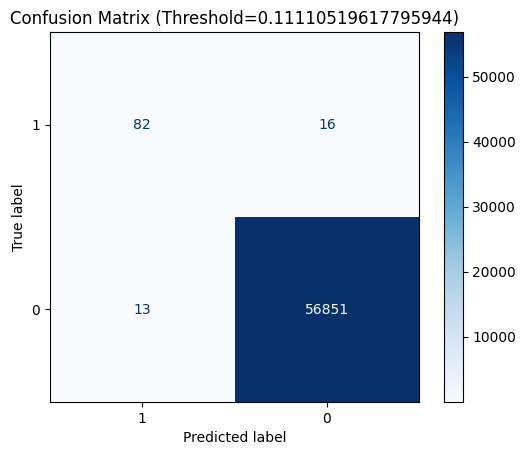

In [56]:
# Step 3: Confusion matrix with class 1 on top
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Reverse order

# Optional: Custom display labels (1 first)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

In [58]:
# Fixed cost scorer - works with binary predictions
def cost_sensitive_score(y_true, y_pred):
    """Cost-sensitive scoring function that works with binary predictions"""
    # Ensure binary predictions
    y_pred_binary = (y_pred > 0.5).astype(int) if y_pred.dtype == float else y_pred

    # Safe confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary, labels=[0, 1])
    if cm.shape != (2, 2):
        return -1e6  # Huge cost if classes are missing

    tn, fp, fn, tp = cm.ravel()
    cost = (fn * 1000) + (fp * 100)  # False negatives cost more
    return -cost  # Negative because sklearn maximizes scores

In [59]:
# Create scorers
f2_scorer = make_scorer(lambda y_true, y_pred: fbeta_score(y_true, y_pred, beta=2.0))
cost_scorer = make_scorer(cost_sensitive_score)  # Remove needs_threshold=True

In [60]:
# Scoring metrics
scoring = {
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1',
    'f2': f2_scorer,
    'roc_auc': 'roc_auc',
    'cost': cost_scorer
}

In [61]:
approach2_results = []

In [62]:
for name in top_3_names:
    print("="*60)
    print(f"Tuning {name} with threshold optimization...")

    # Create threshold-tuned wrapper
    base_model = vanilla_models[name]

    threshold_tuned_model = TunedThresholdClassifierCV(
        estimator=base_model,
        scoring=cost_scorer,  # This determines what metric to optimize threshold for
        cv=3                # Inner CV for threshold tuning
    )

    print("- Starting hyperparameter search...")

    # Grid search over hyperparameters
    grid_search = GridSearchCV(
        threshold_tuned_model,
        param_grids[name],
        cv=skf,  # Outer CV for hyperparameter tuning
        scoring=scoring,
        refit='recall',  # This determines which metric to use for selecting best model
        n_jobs=-1,
        verbose=2
    )

    try:
        grid_search.fit(X_train, y_train)
    except ValueError as e:
        print(f"Search failed for {name}: {e}")
        continue

    print("- Hyperparameter tuning completed!")

    best_model = grid_search.best_estimator_
    best_threshold = best_model.best_threshold_

    print("Storing results...............")
    approach1_results[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
        'best_threshold': best_threshold,
        'cv_results': grid_search.cv_results_
    }

    print(f"  {name} Results:")
    print(f"  Best Recall-Score: {grid_search.best_score_:.4f}")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Best Threshold: {best_threshold:.4f}\n")
    print("="*60 + "\n")

Tuning XGBClassifier with threshold optimization...
- Starting hyperparameter search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:46:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:46:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:46:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

- Hyperparameter tuning completed!
Storing results...............
  XGBClassifier Results:
  Best Recall-Score: 0.8401
  Best Parameters: {'estimator__max_depth': 3, 'estimator__n_estimators': 50, 'estimator__subsample': 1.0}
  Best Threshold: 0.0707


Tuning DecisionTreeClassifier with threshold optimization...
- Starting hyperparameter search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
- Hyperparameter tuning completed!
Storing results...............
  DecisionTreeClassifier Results:
  Best Recall-Score: 0.7894
  Best Parameters: {'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__min_samples_split': 2}
  Best Threshold: 0.0505




In [63]:
# Select best model from Approach 1
best_approach1 = max(approach1_results.items(), key=lambda x: x[1]['best_score'])
print(f"Best model (Approach 1): {best_approach1[0]} with Recall = {best_approach1[1]['best_score']:.4f}")

Best model (Approach 1): XGBClassifier with Recall = 0.8401


In [70]:
best_model = approach1_results['XGBClassifier']
best_model

{'best_estimator': TunedThresholdClassifierCV(cv=3,
                            estimator=XGBClassifier(base_score=None,
                                                    booster=None, callbacks=None,
                                                    colsample_bylevel=None,
                                                    colsample_bynode=None,
                                                    colsample_bytree=None,
                                                    device=None,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric='logloss',
                                                    feature_types=None,
                                                    gamma=None, gpu_id=0,
                                                    grow_policy=None,
                                                    impor

In [64]:
final_model = XGBClassifier(random_state=42,
                            max_depth= 3,
                            n_estimators= 50,
                            subsample= 1.0,
                            eval_metric='logloss',
                            n_jobs=-1,
                            tree_method='gpu_hist',
                            gpu_id=0)

In [65]:
final_model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:02:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [66]:
y_prob = final_model.predict_proba(X_test)[:,1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:03:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [67]:
y_prob

array([3.45717563e-05, 1.61492335e-05, 2.34078383e-03, ...,
       5.31613950e-05, 4.44294092e-05, 1.12730384e-04], dtype=float32)

In [68]:
len(y_prob)

56962

In [71]:
threshold = best_model['best_threshold']
threshold

np.float32(0.070659146)

In [72]:
y_pred = (y_prob >= threshold).astype(int)

In [73]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score
)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.7143
Recall: 0.8673


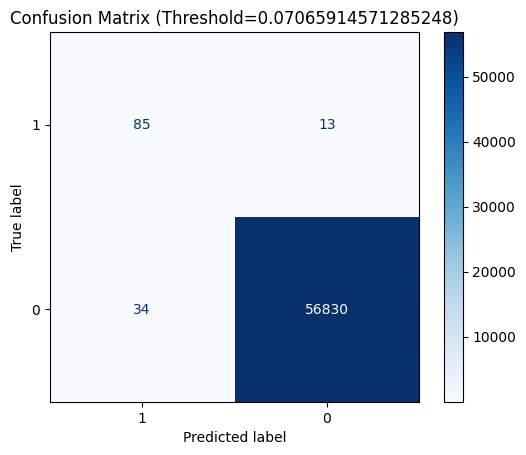

In [74]:
# Step 3: Confusion matrix with class 1 on top
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Reverse order

# Optional: Custom display labels (1 first)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()